# 底打ちどころを探る

## 目的

時価総額の大きい銘柄の値動きのトレンドを読むことで、底打ちどころを探る

In [1]:
import datetime
import re

import matplotlib.font_manager as fm
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
def get_code_into(code):
    symbol = '%s.T' % code
    ticker = yf.Ticker(symbol)
    df = ticker.history(start='2025-03-24', interval='1d')
    print(code, ticker.info['longName'])
    list_new = list()
    for dt_ts in df.index:
        m = pattern.match(str(dt_ts))
        if m:
            list_new.append(pd.to_datetime(m.group(1)))
        else:
            print('Error!')
    df.index = list_new   
    base = df.at[dt, 'Close']
    ser = df['Close'] / base
    print(ser.tail(3))

### 東証で時価総額上位

Reference: https://www.nikkei.com/marketdata/ranking-jp/market-cap-high/

In [3]:
pattern = re.compile(r'([0-9]{4}-[0-9]{2}-[0-9]{2}).*')

In [4]:
pattern_code = re.compile(r'^(.+)([0-9A]{4}).+$')

ods_name = 'mkt_capital_top_30.ods'
df_ods = pd.read_excel(ods_name)
list_code = list()
for name in df_ods['銘柄名']:
    m = pattern_code.match(name)
    if m:
        print(m.group(1))
        code = m.group(2)
        list_code.append(code)
    else:
        print('ERROR!', name)
print(list_code)

トヨタ
ソニーＧ
三菱ＵＦＪ
日立
キーエンス
ファストリ
任天堂
中外薬
ＮＴＴ
三井住友ＦＧ
リクルート
伊藤忠
ＫＤＤＩ
三菱商
東京海上
ＳＢＧ
ＳＢ
東エレク
三菱重
みずほＦＧ
ＪＴ
三井物
信越化
ホンダ
武田
第一三共
富士通
キヤノン
ＨＯＹＡ
三菱電
['7203', '6758', '8306', '6501', '6861', '9983', '7974', '4519', '9432', '8316', '6098', '8001', '9433', '8058', '8766', '9984', '9434', '8035', '7011', '8411', '2914', '8031', '4063', '7267', '4502', '4568', '6702', '7751', '7741', '6503']


In [5]:
dt = pd.to_datetime('2025-03-27')
dt

Timestamp('2025-03-27 00:00:00')

In [6]:
summary = pd.DataFrame()
for code in list_code:
    symbol = '%s.T' % code
    ticker = yf.Ticker(symbol)
    df = ticker.history(start='2025-03-24', interval='1d')
    if len(df) == 0:
        print('### no data in', symbol)
        continue
    list_new = list()
    for dt_ts in df.index:
        m = pattern.match(str(dt_ts))
        if m:
            list_new.append(pd.to_datetime(m.group(1)))
        else:
            print('Error!')
    df.index = list_new            
    base = df.at[dt, 'Close']
    ser = df['Close'] / base
    summary[code] = ser

summary

,7203,6758,8306,6501,6861,9983,7974,4519,9432,8316,...,2914,8031,4063,7267,4502,4568,6702,7751,7741,6503
2025-03-24,1.012197,0.974625,1.001377,1.001070,0.988840,0.973763,0.969175,0.983236,0.984000,0.992380,...,0.972455,0.970608,0.980535,1.031250,0.994306,0.994916,0.986138,0.984179,0.988415,0.975996
2025-03-25,1.019091,0.975142,0.993115,1.006153,0.988193,0.979355,0.975975,0.999574,0.983333,0.980088,...,0.990419,0.975727,0.984738,1.032280,0.995401,0.994113,0.964055,0.994658,1.003673,0.961185
2025-03-26,1.020859,0.997411,0.991049,1.014714,0.993692,0.993548,1.027199,1.007387,0.992000,0.985988,...,0.993772,0.987450,0.990047,1.025412,0.992992,0.996521,0.964055,0.996507,1.006782,0.995063
2025-03-27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2025-03-28,0.971927,0.994548,0.983672,0.985554,0.973799,0.983656,0.989588,1.000426,0.994573,0.967552,...,1.005749,0.988415,0.986347,0.973980,0.999776,0.989749,1.011334,0.989727,0.991806,0.976092
2025-03-31,0.941515,0.977414,0.938185,0.925094,0.945819,0.947527,0.923372,0.965904,0.981683,0.932891,...,0.985389,0.940060,0.948075,0.944093,0.987690,0.947127,0.955635,0.954387,0.948290,0.935673
2025-04-01,0.946734,0.977414,0.930254,0.919743,0.936115,0.955699,0.932049,0.964342,0.980326,0.920354,...,0.995928,0.948623,0.947851,0.945851,1.009176,1.004316,0.960492,0.965276,0.931619,0.925009
2025-04-02,0.955911,0.957944,0.916025,0.927501,0.935145,0.991398,0.951685,0.935502,0.968114,0.904867,...,0.986826,0.936199,0.945837,0.957103,0.997762,0.966280,0.957416,0.964660,0.930206,0.942896
2025-04-03,0.906424,0.911734,0.850478,0.867576,0.898916,0.974194,0.920632,0.941611,0.966757,0.835300,...,0.969581,0.914876,0.921218,0.934951,1.016115,0.979768,0.929080,0.916992,0.887821,0.911249
2025-04-04,0.866475,0.868380,0.778400,0.817014,0.884522,0.965591,0.911225,0.945305,0.977612,0.768191,...,0.973892,0.890698,0.871531,0.883966,1.002014,0.976531,0.909812,0.880214,0.883865,0.869797


In [7]:
summary

,7203,6758,8306,6501,6861,9983,7974,4519,9432,8316,...,2914,8031,4063,7267,4502,4568,6702,7751,7741,6503
2025-03-24,1.012197,0.974625,1.001377,1.001070,0.988840,0.973763,0.969175,0.983236,0.984000,0.992380,...,0.972455,0.970608,0.980535,1.031250,0.994306,0.994916,0.986138,0.984179,0.988415,0.975996
2025-03-25,1.019091,0.975142,0.993115,1.006153,0.988193,0.979355,0.975975,0.999574,0.983333,0.980088,...,0.990419,0.975727,0.984738,1.032280,0.995401,0.994113,0.964055,0.994658,1.003673,0.961185
2025-03-26,1.020859,0.997411,0.991049,1.014714,0.993692,0.993548,1.027199,1.007387,0.992000,0.985988,...,0.993772,0.987450,0.990047,1.025412,0.992992,0.996521,0.964055,0.996507,1.006782,0.995063
2025-03-27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2025-03-28,0.971927,0.994548,0.983672,0.985554,0.973799,0.983656,0.989588,1.000426,0.994573,0.967552,...,1.005749,0.988415,0.986347,0.973980,0.999776,0.989749,1.011334,0.989727,0.991806,0.976092
2025-03-31,0.941515,0.977414,0.938185,0.925094,0.945819,0.947527,0.923372,0.965904,0.981683,0.932891,...,0.985389,0.940060,0.948075,0.944093,0.987690,0.947127,0.955635,0.954387,0.948290,0.935673
2025-04-01,0.946734,0.977414,0.930254,0.919743,0.936115,0.955699,0.932049,0.964342,0.980326,0.920354,...,0.995928,0.948623,0.947851,0.945851,1.009176,1.004316,0.960492,0.965276,0.931619,0.925009
2025-04-02,0.955911,0.957944,0.916025,0.927501,0.935145,0.991398,0.951685,0.935502,0.968114,0.904867,...,0.986826,0.936199,0.945837,0.957103,0.997762,0.966280,0.957416,0.964660,0.930206,0.942896
2025-04-03,0.906424,0.911734,0.850478,0.867576,0.898916,0.974194,0.920632,0.941611,0.966757,0.835300,...,0.969581,0.914876,0.921218,0.934951,1.016115,0.979768,0.929080,0.916992,0.887821,0.911249
2025-04-04,0.866475,0.868380,0.778400,0.817014,0.884522,0.965591,0.911225,0.945305,0.977612,0.768191,...,0.973892,0.890698,0.871531,0.883966,1.002014,0.976531,0.909812,0.880214,0.883865,0.869797


In [8]:
df_ranking = summary.tail(1).iloc[0].sort_values(ascending=False)
df_ranking

4519    1.175451
9433    1.050219
2914    1.042874
7974    1.041191
7011    1.034626
7267    1.010900
9983    1.005376
6501    1.001605
9432    1.001357
9434    1.000470
6702    0.997409
8001    0.997342
6861    0.991590
8058    0.973110
7203    0.968148
8035    0.966612
4502    0.956804
4568    0.950364
8031    0.946944
7741    0.935010
6098    0.918518
6758    0.917705
8766    0.910504
6503    0.910389
4063    0.905551
9984    0.902875
7751    0.890076
8306    0.809424
8316    0.808997
8411    0.790487
Name: 2025-04-25 00:00:00, dtype: float64

In [9]:
list_ranking = df_ranking.index[0:10]
for code in list_ranking:
    get_code_into(code)
    print()

print('Median')
print(summary.median(axis=1).tail(3))

4519 Chugai Pharmaceutical Co., Ltd.
2025-04-23    1.164086
2025-04-24    1.172184
2025-04-25    1.175451
Name: Close, dtype: float64

9433 KDDI Corporation
2025-04-23    1.075224
2025-04-24    1.040633
2025-04-25    1.050219
Name: Close, dtype: float64

2914 Japan Tobacco Inc.
2025-04-23    1.057725
2025-04-24    1.039760
2025-04-25    1.042874
Name: Close, dtype: float64

7974 Nintendo Co., Ltd.
2025-04-23    0.951228
2025-04-24    1.004658
2025-04-25    1.041191
Name: Close, dtype: float64

7011 Mitsubishi Heavy Industries, Ltd.
2025-04-23    0.994731
2025-04-24    1.014866
2025-04-25    1.034626
Name: Close, dtype: float64

7267 Honda Motor Co., Ltd.
2025-04-23    0.997539
2025-04-24    1.003868
2025-04-25    1.010900
Name: Close, dtype: float64

9983 Fast Retailing Co., Ltd.
2025-04-23    1.000000
2025-04-24    0.994624
2025-04-25    1.005376
Name: Close, dtype: float64

6501 Hitachi, Ltd.
2025-04-23    0.941680
2025-04-24    0.951578
2025-04-25    1.001605
Name: Close, dtype: flo

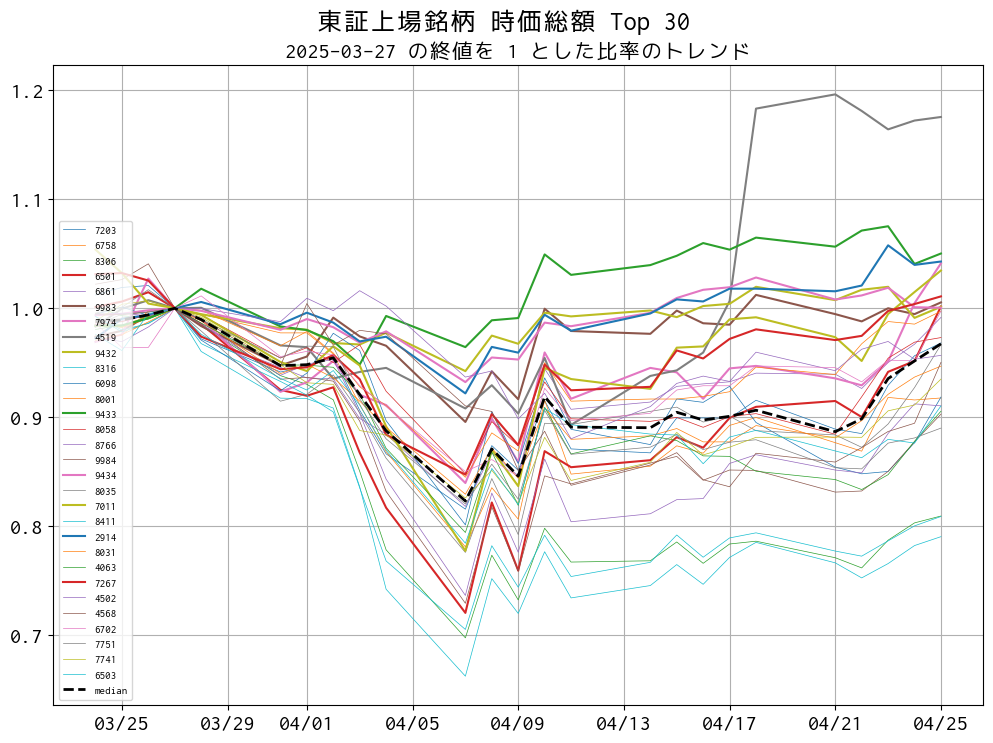

In [10]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(top=0.91)

for colname in summary.columns:
    if colname in list_ranking:
        width = 1.5
        lstyle = 'solid'
    else:
        width = 0.5
        lstyle = 'solid'

    ax.plot(summary[colname], lw=width, ls=lstyle, label=colname)

ax.plot(summary.median(axis=1), lw=2, color='black', ls='dashed', label='median')

ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
#ax.xaxis.set_ticks(df.index)

m = pattern.match(str(dt))
date_str = m.group(1)
fig.suptitle('東証上場銘柄 時価総額 Top 30')
ax.set_title('%s の終値を 1 とした比率のトレンド' % date_str, fontsize=16)
ax.grid()
ax.legend(loc='lower left', fontsize=8)

plt.savefig('report_bottom_out.png' )
plt.show()

In [11]:
summary.median(axis=1)

2025-03-24    0.987860
2025-03-25    0.989306
2025-03-26    0.993942
2025-03-27    1.000000
2025-03-28    0.989657
2025-03-31    0.947327
2025-04-01    0.948237
2025-04-02    0.954477
2025-04-03    0.920925
2025-04-04    0.887610
2025-04-07    0.823181
2025-04-08    0.870940
2025-04-09    0.846023
2025-04-10    0.918871
2025-04-11    0.890984
2025-04-14    0.890423
2025-04-15    0.904594
2025-04-16    0.897529
2025-04-17    0.900864
2025-04-18    0.906460
2025-04-21    0.886798
2025-04-22    0.898562
2025-04-23    0.935479
2025-04-24    0.951664
2025-04-25    0.967380
dtype: float64